# Classical Machine Learning Approach

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [2]:
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to /home/dan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df_train = pd.read_csv("../data/tweets_stock_clean.csv").set_index('tweet_id')
df_test = pd.read_csv("../data/tweets_stocks-full_agreement.csv").set_index('tweet_id')

targets = ['TRU', 'DIS', 'JOY', 'SAD', 'ANT', 'SUR', 'ANG', 'FEA']

to_delete = ['NEUTRAL', 'conf_tru_dis', 'conf_joy_sad', 'conf_ant_sur',
       'conf_ang_fea', 'num_annot']

df_train.drop(columns=to_delete, inplace=True)
df_test.drop(columns=to_delete, inplace=True)

df_train

,text,TRU,DIS,JOY,SAD,ANT,SUR,ANG,FEA
tweet_id,,,,,,,,,
446333972562591745l,enquanto isso #lame4 rs,0,0,-1,-1,0,0,0,0
446341582183464960l,"PETR4 subiu na bolsa 13,50. Muito bem, surpres...",1,0,1,0,0,1,0,0
448105739962548224l,"vai, oibr4. um troux... ops... investidor prec...",0,1,0,1,0,0,1,0
446250331123773440l,$LREN3 - Lojas Renner (lren-nm) - Declaracao E...,0,0,0,0,-1,-1,-2,-2
448130972039385089l,Barriga para dentro em uma semana - http://t.c...,-2,-2,-2,-2,-2,-2,0,0
...,...,...,...,...,...,...,...,...,...
456788707576532992l,$EMBR3 - Embraer (embr-nm) - Aviso Aos Acionis...,0,0,0,0,1,0,0,0
458688220092715008l,ABEV3: Oportunidade de compra (+ de 20% de alt...,1,0,0,0,1,0,0,0
444219554114195457l,BBAS3_Mensal !!! Alguém tem algum recado para ...,0,1,-2,-2,-2,-2,0,0


In [4]:
def clean_tweet(tweet):
    '''
    Utility function to clean tweet text by removing links, special characters
    using simple regex statements.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

df_train['text'] = df_train['text'].apply(lambda text: clean_tweet(text))
df_test['text'] = df_test['text'].apply(lambda text: clean_tweet(text))

In [5]:
for target in targets:
    df_train[target] = df_train[target] > 0 
    df_test[target] = df_test[target] > 0

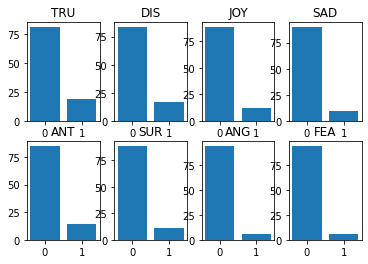

In [6]:
count=0
for target in targets:
    count+=1
    plt.subplot(240 + count)
    
    summ = df_train[target].value_counts()
    keys = summ.index
    vals = 100*summ.values / sum(summ.values)
    name = summ.name
    
    plt.bar(keys, vals)
    plt.title(name)

plt.show()

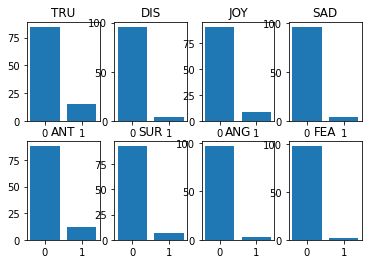

In [7]:
count=0
for target in targets:
    count+=1
    plt.subplot(240 + count)
    
    summ = df_test[target].value_counts()
    keys = summ.index
    vals = 100*summ.values / sum(summ.values)
    name = summ.name
    
    plt.bar(keys, vals)
    plt.title(name)

plt.show()

In [8]:
def predict(freq_tweets, test_tweets):
    model = LogisticRegression()
    results = df_test[targets].copy()

    for target in targets:
        model.fit(freq_tweets, df_train[target])
        results[target] = model.predict(test_tweets)
        
    y_pred = np.array(results).flatten()
    y_true = np.array(df_test[targets]).flatten()     
    
    results.to_csv("confusao_pred_.csv", index = False, encoding='utf-8')
    df_test[targets].to_csv("confusao_true_.csv", index = False, encoding='utf-8')
    
    cf_matrix=confusion_matrix(y_pred, y_true)
    
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

    ax.set_title('Confusion Matrix\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()
    
    print("Accuracy:",  round(100*accuracy_score(y_pred, y_true),2), '%')
    print("Precision:", round(100*precision_score(y_pred, y_true),2), '%')
    print("Recall:",    round(100*recall_score(y_pred, y_true),2), '%')
    print("F1-score:",  round(100*f1_score(y_pred, y_true), 2), '%')
    
    for target in targets:
        print(target)
        print("   Accuracy:",  round(100*accuracy_score(results[target], df_test[target]),2), '%')
        print("   Precision:", round(100*precision_score(results[target], df_test[target]),2), '%')
        print("   Recall:",    round(100*recall_score(results[target], df_test[target]),2), '%')
        print("   F1-score:",  round(100*f1_score(results[target], df_test[target]), 2), '%')
        print()
        
    

# Bag of Words

In [ ]:
vectorizer = CountVectorizer(analyzer="word", stop_words=stopwords,ngram_range=(1,2))

tweets = df_train['text'].values
freq_tweets = vectorizer.fit_transform(tweets)

tweets = df_test['text'].values
test_tweets = vectorizer.transform(tweets)

predict(freq_tweets, test_tweets)

# TF IDF

In [ ]:
vectorizer = TfidfVectorizer(analyzer="word", stop_words=stopwords, ngram_range=(1,2))

tweets = df_train['text'].values
freq_tweets = vectorizer.fit_transform(tweets)

tweets = df_test['text'].values
test_tweets = vectorizer.transform(tweets)

#predict(freq_tweets, test_tweets)